In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from pandas_datareader import data,wb

In [76]:
from datetime import datetime

In [77]:
start=datetime(2006,1,1)

In [78]:
end=datetime(2016,1,1)

In [79]:
BAC=data.DataReader('BAC','yahoo',start,end)

In [80]:
CG=data.DataReader("C","yahoo",start,end)

In [81]:
GS=data.DataReader("GS","yahoo",start,end)

In [82]:
JP=data.DataReader("JPM","yahoo",start,end)

In [83]:
MS=data.DataReader("MS","yahoo",start,end)

In [84]:
WF=data.DataReader("WFC","yahoo",start,end)

In [85]:
list=['BAC','CG','GS','JPM','WF','MS']

In [86]:
DF=pd.concat([BAC,CG,GS,JP,WF,MS],axis=1,keys=list)  #coloumn wise and giving each df it seperation

In [87]:
DF.columns.names=['BankTicker','Stock Info'] # colomn name are added 

In [88]:
DF.head(2)

BankTicker        BAC                                                          \
Stock Info       High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   

BankTicker          CG                                      ...         WF  \
Stock Info        High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  31.600000   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  31.799999   

BankTicker                                           MS                        \
Stock Info      Close      Volume  Adj Close       High        Low       Open   
Date                                                                            
2006-01-03  31.900000  11016400.0  20.823185  58.490002  56.740002  57.169998   
2006-01-04  31.530001  10870000.0  20.581659  59.279999  58.349998  58.700001   

BankTicker                                   
Stock Info      Close     Volume  Adj Close  
Date                                         
2006-01-03  58.310001  5377000.0  37.758644  
2006-01-04  58.349998  7977800.0  37.784546  

[2 rows x 36 columns]

In [89]:
# .xs() retrieves max close price
DF['BAC']['Low'].max()

54.81999969482422

In [90]:
DF['CG']['Low'].max()

555.5

In [91]:
DF['WF']['Low'].max()

58.06999969482422

In [92]:
DF['MS']['Low'].max()

88.33000183105469

In [93]:
for tick in list:
            print(DF[tick]['Close'].max())


54.900001525878906
564.0999755859375
247.9199981689453
70.08000183105469
58.52000045776367
89.30000305175781


In [94]:
DF.xs(key='Close',level='Stock Info',axis=1).max()   # at what level it is present in

BankTicker
BAC     54.900002
CG     564.099976
GS     247.919998
JPM     70.080002
WF      58.520000
MS      89.300003
dtype: float64

In [61]:
returns=pd.DataFrame()

In [62]:
DF.head()

BankTicker        BAC                                                          \
Stock Info       High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.968796   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.916302   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.938789   

BankTicker          CG                                      ...         WF  \
Stock Info        High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  31.600000   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  31.799999   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  31.500000   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  31.580000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  31.674999   

BankTicker                                           MS                        \
Stock Info      Close      Volume  Adj Close       High        Low       Open   
Date                                                                            
2006-01-03  31.900000  11016400.0  20.823185  58.490002  56.740002  57.169998   
2006-01-04  31.530001  10870000.0  20.581659  59.279999  58.349998  58.700001   
2006-01-05  31.495001  10158000.0  20.558811  58.590000  58.020000  58.549999   
2006-01-06  31.680000   8403800.0  20.679575  58.849998  58.049999  58.770000   
2006-01-09  31.674999   5619600.0  20.676311  59.290001  58.619999  58.630001   

BankTicker                                   
Stock Info      Close     Volume  Adj Close  
Date                                         
2006-01-03  58.310001  5377000.0  37.758644  
2006-01-04  58.349998  7977800.0  37.784546  
2006-01-05  58.509998  5778000.0  37.888165  
2006-01-06  58.570000  6889800.0  37.927017  
2006-01-09  59.189999  4144500.0  38.328484  

[5 rows x 36 columns]

In [95]:
for tick in list:
    ad=DF[tick]['Close'].pct_change()
    returns[tick+'return']=ad

In [66]:
import seaborn as sns


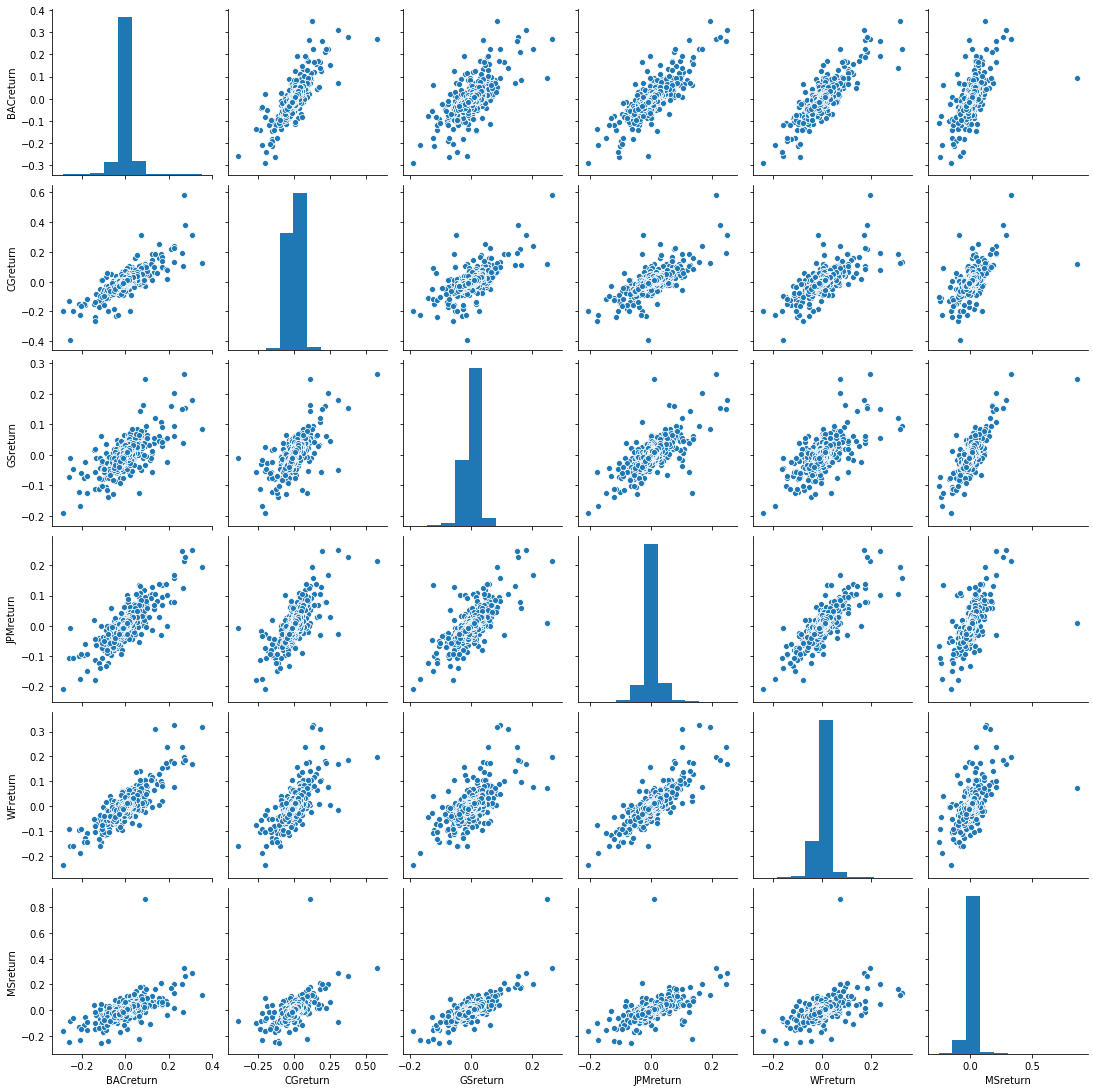

In [69]:
sns.pairplot(returns)

In [105]:
returnBAC=returns['BACreturn'].reset_index()

In [109]:
returnBAC.max()

Date         2015-12-31 00:00:00
BACreturn               0.352691
dtype: object

In [110]:
returnBAC.min()

Date         2006-01-03 00:00:00
BACreturn              -0.289694
dtype: object

In [112]:
returns['CGreturn'].reset_index().min()

Date        2006-01-03 00:00:00
CGreturn              -0.390244
dtype: object

In [113]:
returns['GSreturn'].reset_index().min()

Date        2006-01-03 00:00:00
GSreturn              -0.189596
dtype: object

In [114]:
returns['JPMreturn'].reset_index().min()

Date         2006-01-03 00:00:00
JPMreturn              -0.207274
dtype: object

In [127]:
for a in list:
    print(returns[a+'return'].reset_index().min())

Date         2006-01-03 00:00:00
BACreturn              -0.289694
dtype: object
Date        2006-01-03 00:00:00
CGreturn              -0.390244
dtype: object
Date        2006-01-03 00:00:00
GSreturn              -0.189596
dtype: object
Date         2006-01-03 00:00:00
JPMreturn              -0.207274
dtype: object
Date        2006-01-03 00:00:00
WFreturn              -0.238223
dtype: object
Date        2006-01-03 00:00:00
MSreturn              -0.258929
dtype: object


In [128]:
#we can observe that min val occurs at a single day that 2006-01-01 for all the banks and it must have significance


In [129]:
for a in list:
    print(returns[a+'return'].reset_index().max())

Date         2015-12-31 00:00:00
BACreturn               0.352691
dtype: object
Date        2015-12-31 00:00:00
CGreturn               0.578249
dtype: object
Date        2015-12-31 00:00:00
GSreturn               0.264678
dtype: object
Date         2015-12-31 00:00:00
JPMreturn               0.250967
dtype: object
Date        2015-12-31 00:00:00
WFreturn               0.327645
dtype: object
Date        2015-12-31 00:00:00
MSreturn               0.869835
dtype: object


In [140]:
for a in list:
    print(returns[a+'return'].reset_index().std())

BACreturn    0.036647
dtype: float64
CGreturn    0.038672
dtype: float64
GSreturn    0.02539
dtype: float64
JPMreturn    0.027667
dtype: float64
WFreturn    0.030238
dtype: float64
MSreturn    0.037819
dtype: float64


In [141]:
#least standard deviation for CG

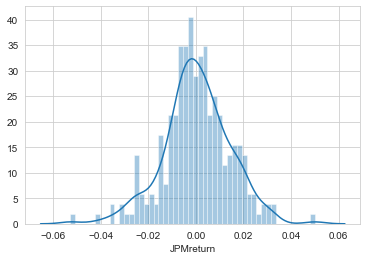

In [252]:
abc=returns['JPMreturn'].reset_index()
sns.distplot(abc[abc['Date']>datetime(2014,12,31)]['JPMreturn'],bins=50) #2015 data for JP Morgan stanley
# 0.04 to 0.04 very less fluctuation

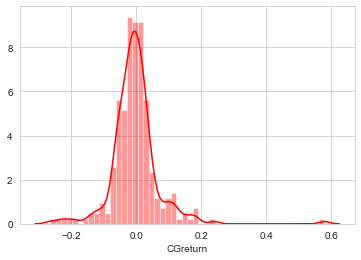

In [256]:
abc=returns['CGreturn'].reset_index()
abc=abc[abc['Date']>datetime(2007,12,31)]
abc=abc[abc['Date']<datetime(2009,1,1)]
sns.distplot(abc['CGreturn'],color='red',bins=50)  # just the 2008 data
# variation is from 0.2 to 0.4 even went to 0.6

In [240]:
# visualization

In [197]:
sns.set_style('whitegrid')

In [198]:
# plotly and cufflinks for interactive data
import plotly
import cufflinks as cf
cf.go_offline()

In [205]:
returns.idxmin()  #if we want to get the index 20th of january 2009

BACreturn   2009-01-20
CGreturn    2009-02-27
GSreturn    2009-01-20
JPMreturn   2009-01-20
WFreturn    2009-01-20
MSreturn    2008-10-09
dtype: datetime64[ns]

In [212]:
returns.idxmax() 

BACreturn   2009-04-09
CGreturn    2008-11-24
GSreturn    2008-11-24
JPMreturn   2009-01-21
WFreturn    2008-07-16
MSreturn    2008-10-13
dtype: datetime64[ns]

In [213]:
returns.std()  # greater the riskier

BACreturn    0.036647
CGreturn     0.038672
GSreturn     0.025390
JPMreturn    0.027667
WFreturn     0.030238
MSreturn     0.037819
dtype: float64

In [220]:
# returns.ix['2015-01-01':'2015-12-31'].std() .ix is deprecated

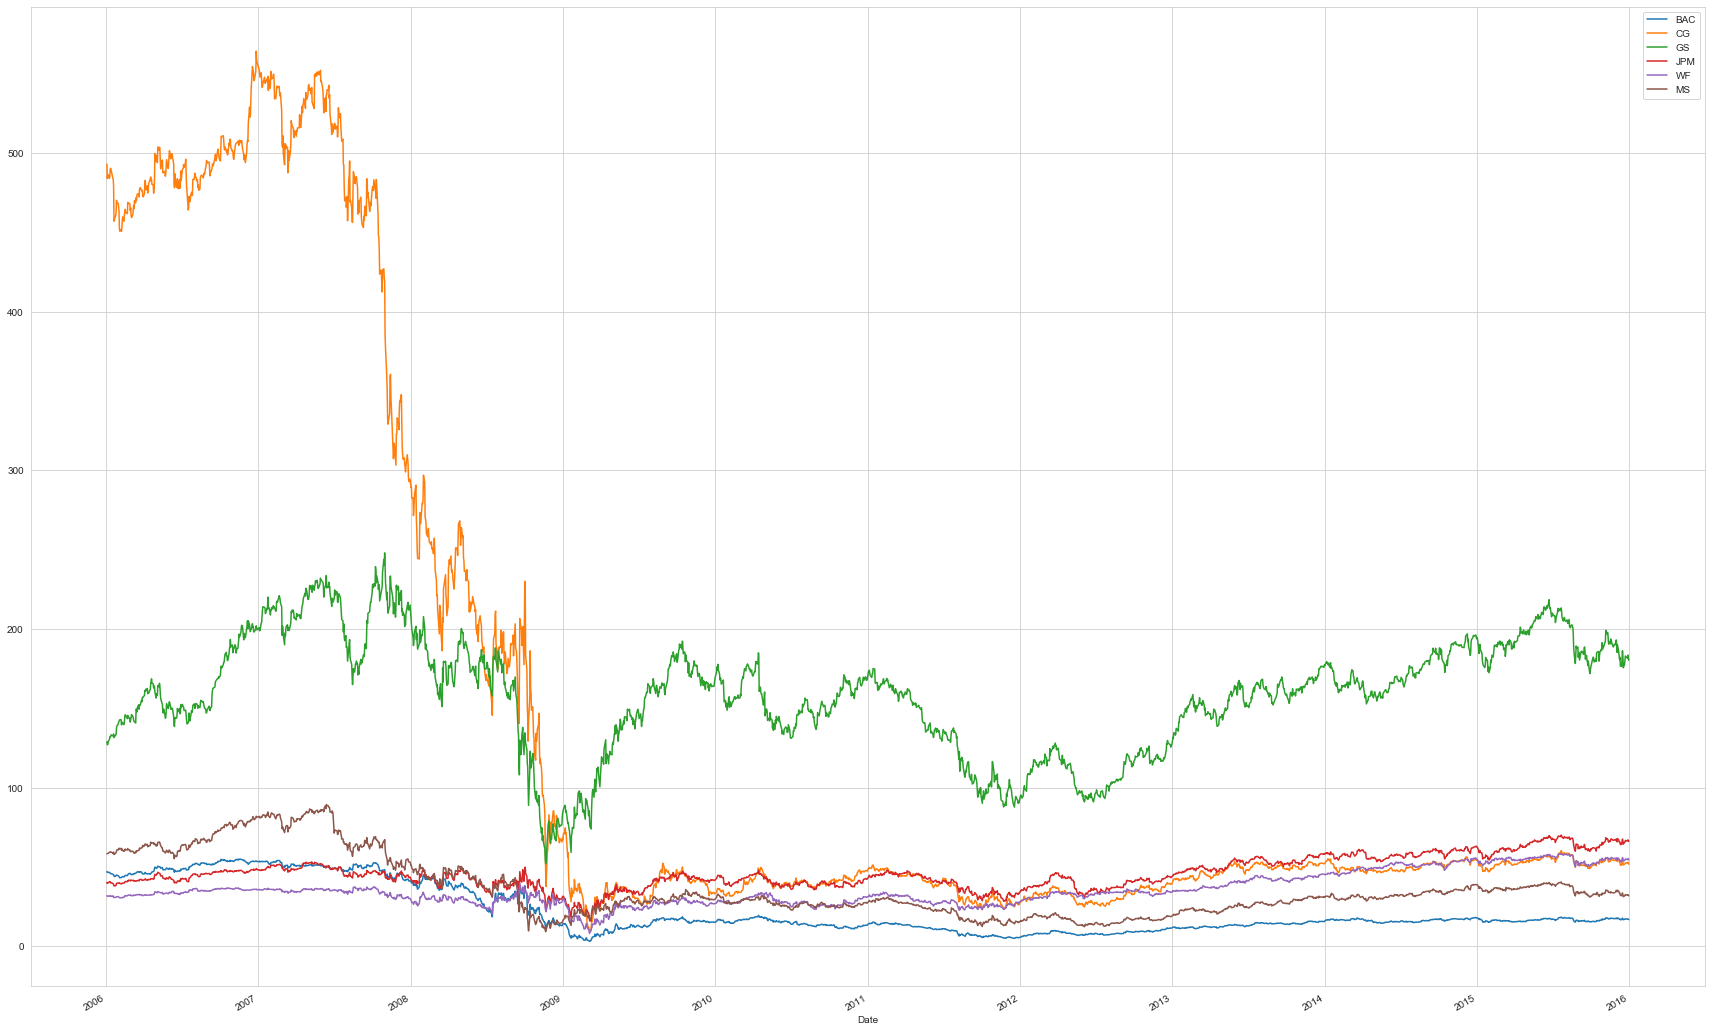

In [278]:
for x in list:
           DF[x]['Close'].plot(figsize=(30,20),label=x)
plt.legend()

In [288]:
DF.xs(key='Close',axis=1,level='Stock Info').iplot()



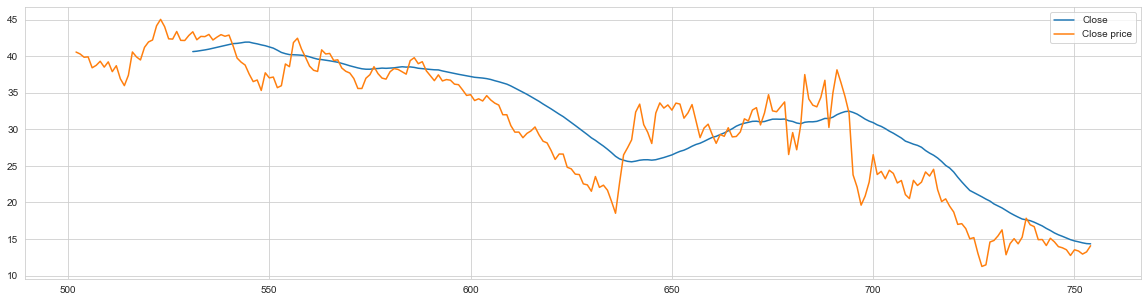

In [316]:
thirty=BAC['Close'].reset_index()
thirty=thirty[thirty['Date']>datetime(2007,12,31)]
thirty[thirty['Date']<datetime(2009,1,1)].rolling(window=30).mean().plot()
thirty=thirty[thirty['Date']<datetime(2009,1,1)]
thirty['Close'].plot(figsize=(20,5),label='Close price')
plt.legend()

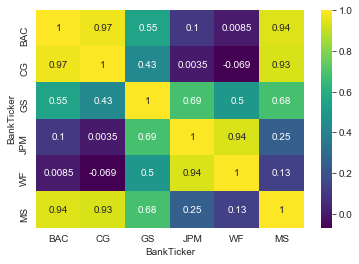

In [342]:
#correlation
sns.heatmap(DF.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='viridis')
#for heatmap the data must be in form of matrix
#DF.xs(key='Close',axis=1,level='Stock Info').corr()

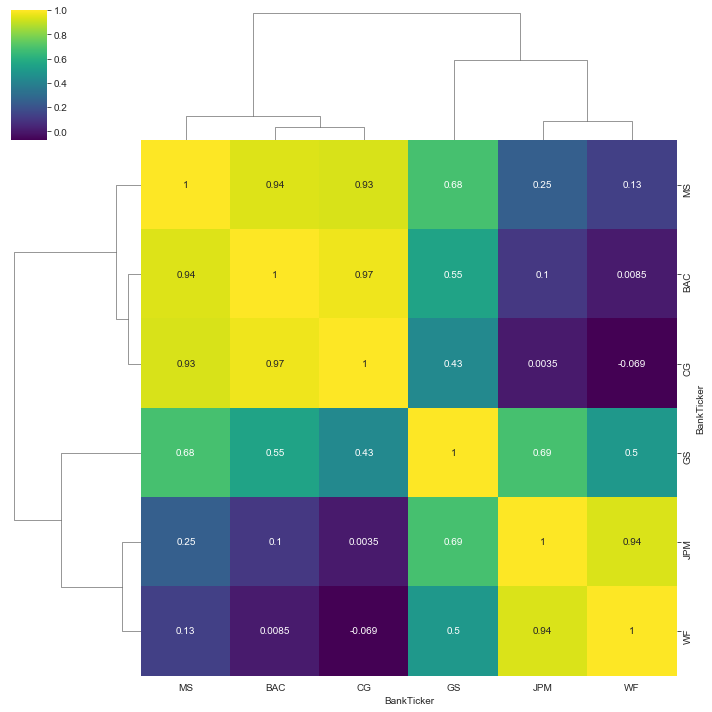

In [343]:
sns.clustermap(DF.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='viridis')

In [346]:
a=DF.xs(key='Close',axis=1,level='Stock Info').corr()
a.iplot(kind='heatmap',colorscale='rdylbu')  #cufflinks

In [355]:
BAC[['Open','High','Low','Close']].iplot(kind='candle') #candle stick plot for stock analysis

In [364]:
MS['Close'].ta_plot(study='sma',periods=[13,15,21,55]) #kind of rolling averages periods denotes the averages

In [366]:
MS['Close'].ta_plot(study='boll',periods=[13,15,21,55])